In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
# Load and inspect data
data = pd.read_csv("orbit.csv")  # Ensure your CSV contains 'time_steps' and 'y'
data.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [7]:
# Check for missing values
data.isnull().sum()  # Check for NaN values

# Remove rows with missing values (if any)
# data.dropna(inplace=True)

,0
time_steps,0
y,0


In [8]:
# Data Preprocessing
time_steps = data['time_steps'].to_numpy().reshape(-1, 1)
y_positions = data['y'].to_numpy()

In [9]:
# Normalize 'time_steps' to range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
time_steps_scaled = scaler.fit_transform(time_steps)

In [10]:
# Create polynomial features (adding squared time steps as input)
time_steps_squared = np.power(time_steps, 2).reshape(-1, 1)
time_steps_poly = np.hstack([time_steps_scaled, time_steps_squared])  # Combine features

In [13]:
# Split data into training and validation sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(time_steps_poly, y_positions, test_size=0.2, random_state=42)

In [15]:
#%% Define the neural network model
model = Sequential()

# Define architecture with Dropout layers to prevent overfitting
model.add(Dense(64, input_shape=(2,), activation='relu'))  # Two inputs (time_steps and squared)
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression (1 value)

#%% Compile the model
model.compile(optimizer=Adam(learning_rate=0.00005), loss='mse', metrics=['mae'])

#%% Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [16]:
#%% Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1751.0311 - mae: 31.2786 - val_loss: 1498.9996 - val_mae: 29.8773
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1300.3723 - mae: 26.2327 - val_loss: 1217.9604 - val_mae: 26.9228
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1101.3518 - mae: 24.4351 - val_loss: 980.6312 - val_mae: 24.1478
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 942.8402 - mae: 22.7670 - val_loss: 778.5299 - val_mae: 21.5052
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 715.9350 - mae: 19.6172 - val_loss: 611.0920 - val_mae: 19.0414
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 579.4777 - mae: 17.8465 - val_loss: 466.2114 - val_mae: 16.6204
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 445.6107 - mae: 15.5334 - val_loss: 349.2104 - val_mae: 14.3730
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310.7376 - mae: 13.0265 - val_loss: 255.8081 - val_mae: 12.2872
Epoch 9/500

In [22]:
#%% Evaluate the model on validation set
val_predictions = model.predict(X_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [18]:
# Calculate evaluation metrics
mse = mean_squared_error(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
r2 = r2_score(y_val, val_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2.1865423869348677e-07
Mean Absolute Error (MAE): 0.0003431107341289162
R-squared (R2): 0.9999999997356582


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


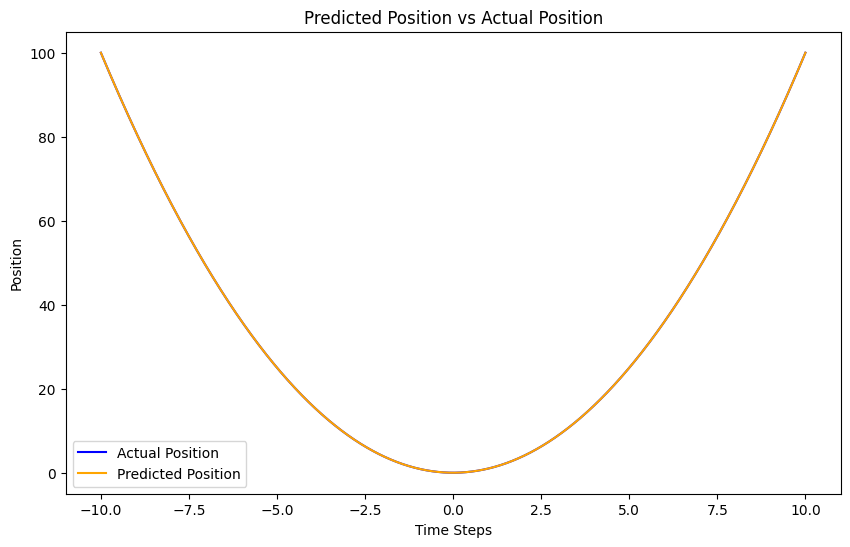

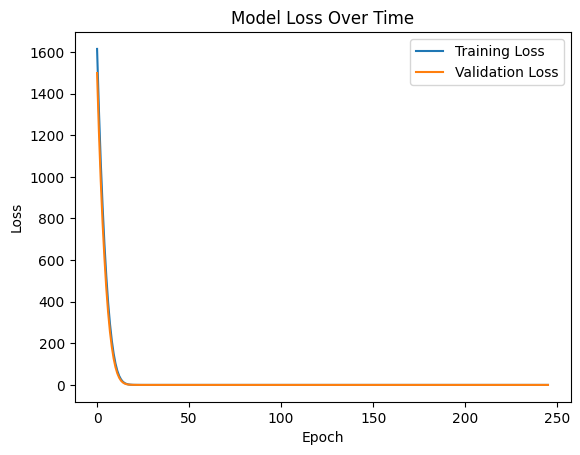

In [27]:
# Predict the entire dataset for better visualization
y_pred = model.predict(time_steps_poly)

# Plot actual vs predicted positions
plt.figure(figsize=(10, 6))
plt.plot(time_steps, y_positions, label="Actual Position", color="blue")
plt.plot(time_steps, y_pred, label="Predicted Position", color="orange")
plt.title("Predicted Position vs Actual Position")
plt.xlabel("Time Steps")
plt.ylabel("Position")
plt.legend()
plt.show()

#%% Plot loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

test
# **bold text**

   time_steps           y
0  -10.000000  100.000000
1   -9.989995   99.800000
2   -9.979990   99.600200
3   -9.969985   99.400601
4   -9.959980   99.201201
time_steps    0
y             0
dtype: int64
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2053.4023 - mae: 33.3762 - val_loss: 1950.7394 - val_mae: 34.0826
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1753.3409 - mae: 30.3655 - val_loss: 1755.2417 - val_mae: 32.3239
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1635.2072 - mae: 29.8662 - val_loss: 1570.2902 - val_mae: 30.5646
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1496.1720 - mae: 28.7556 - val_loss: 1365.1016 - val_mae: 28.4881
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1277.9574 - mae: 26.2688 - val_loss: 1180.6327 - val_mae: 26.4835
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1112.0510 - mae: 24.4439 - val_loss: 1014.0620 - val_mae: 24.5338
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 990.7247 - mae: 23.1879 - val_loss: 858.0492 - val_mae: 22.5559
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 747.6337 - mae: 20.3681 - val_loss: 717.8141 - val_mae: 20.6176
Epoch 9/500
50/5

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error (MSE): 7.097615539882395e-07
Mean Absolute Error (MAE): 0.0006260141299791286
R-squared (R2): 0.9999999991419346
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


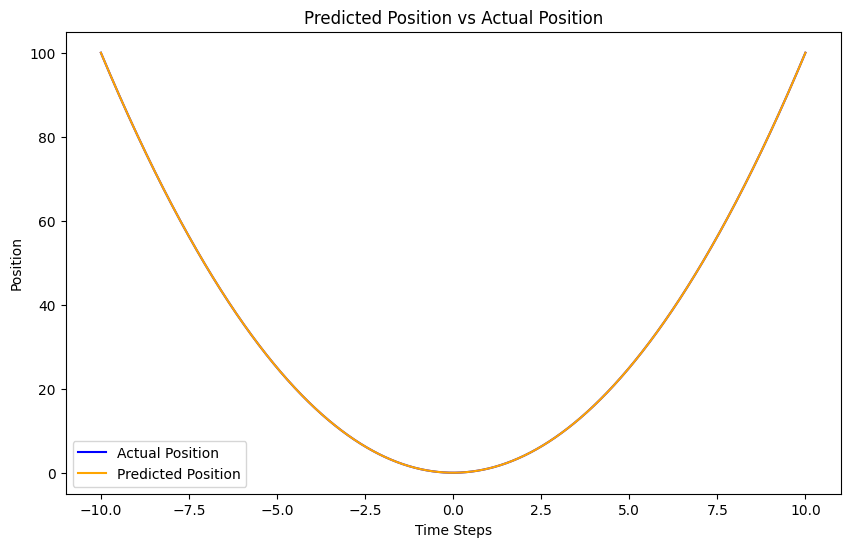

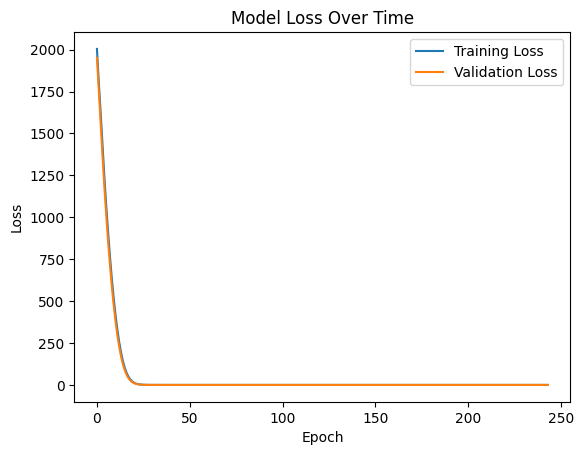

In [12]:
#%% Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#%% Load and inspect data
data = pd.read_csv("orbit.csv")  # Ensure your CSV contains 'time_steps' and 'y'
print(data.head())

# Check for missing values
print(data.isnull().sum())  # Check for NaN values

# Remove rows with missing values (if any)
data.dropna(inplace=True)

#%% Data Preprocessing
time_steps = data['time_steps'].to_numpy().reshape(-1, 1)
y_positions = data['y'].to_numpy()

# Normalize 'time_steps' to range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
time_steps_scaled = scaler.fit_transform(time_steps)

# Create polynomial features (adding squared time steps as input)
time_steps_squared = np.power(time_steps, 2).reshape(-1, 1)
time_steps_poly = np.hstack([time_steps_scaled, time_steps_squared])  # Combine features

#%% Split data into training and validation sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(time_steps_poly, y_positions, test_size=0.2, random_state=42)

#%% Define the neural network model
model = Sequential()

# Define architecture with Dropout layers to prevent overfitting
model.add(Dense(64, input_shape=(2,), activation='relu'))  # Two inputs (time_steps and squared)
# model.add(Dropout(0.2))  # Add dropout to reduce overfitting
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression (1 value)

#%% Compile the model
model.compile(optimizer=Adam(learning_rate=0.00005), loss='mse', metrics=['mae'])

#%% Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#%% Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

#%% Evaluate the model on validation set
val_predictions = model.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, val_predictions)
mae = mean_absolute_error(y_val, val_predictions)
r2 = r2_score(y_val, val_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

#%% Visualization of predicted vs actual positions

# Predict the entire dataset for better visualization
y_pred = model.predict(time_steps_poly)

# Plot actual vs predicted positions
plt.figure(figsize=(10, 6))
plt.plot(time_steps, y_positions, label="Actual Position", color="blue")
plt.plot(time_steps, y_pred, label="Predicted Position", color="orange")
plt.title("Predicted Position vs Actual Position")
plt.xlabel("Time Steps")
plt.ylabel("Position")
plt.legend()
plt.show()

#%% Plot loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

Training started...
Epoch 1/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1820.1362
Epoch 2/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1544.4945
Epoch 3/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1199.5975
Epoch 4/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1052.4807
Epoch 5/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 763.7118
Epoch 6/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 554.9016
Epoch 7/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 405.5260
Epoch 8/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 260.4623
Epoch 9/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 162.9259
Epoch 10/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 82.8821
Epoch 11/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.2880
Epoch 12/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8281
Epoch 13/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0503
Epoch 14/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0385
Epoch 15/500
63/63 ━━━━━━━━

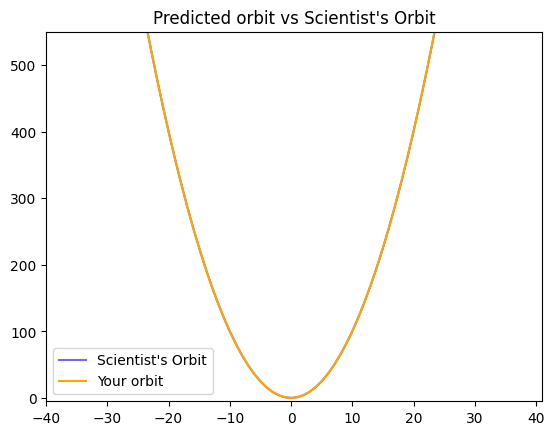

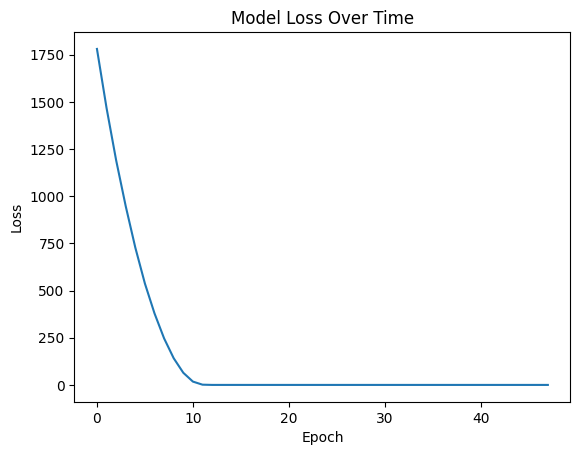

In [11]:
#%% Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

#%% Load data
data = pd.read_csv("orbit.csv")
time_steps = data['time_steps'].to_numpy()
y_positions = data['y'].to_numpy()

#%% Normalize time_steps using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
time_steps_scaled = scaler.fit_transform(time_steps.reshape(-1, 1))

# Create polynomial features (adding squared time steps as input)
time_steps_squared = np.power(time_steps, 2).reshape(-1, 1)
time_steps_poly = np.hstack([time_steps_scaled, time_steps_squared])  # Combined features

#%% Define the neural network model
model = Sequential()

# Modified architecture with increased complexity and dropout layers
model.add(Dense(64, input_shape=(2,), activation='relu'))  # Two inputs (time_steps and squared)
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Print model summary
model.summary()

#%% Compile the model with reduced learning rate
model.compile(optimizer=RMSprop(learning_rate=0.00005), loss='mse')

#%% Early Stopping
early_stopping = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

print('Training started...')

#%% Train the model and save loss history
history = model.fit(time_steps_poly, y_positions, epochs=500, batch_size=32, callbacks=[early_stopping])

print('Training ended...')

#%% Function to plot the orbits
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1), np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")  # Scientist's reference orbit
    plt.plot(np.arange(-axeslim, axeslim + 1), model_preds, color="orange")  # Predicted orbit
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'], loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

#%% Predict the eighty minute orbit with normalized time_steps and polynomial features
time_steps_pred = np.arange(-100, 101).reshape(-1, 1)
time_steps_pred_scaled = scaler.transform(time_steps_pred)
time_steps_pred_squared = np.power(time_steps_pred, 2).reshape(-1, 1)
time_steps_pred_poly = np.hstack([time_steps_pred_scaled, time_steps_pred_squared])

# Predict orbit
eighty_min_orbit = model.predict(time_steps_pred_poly)

#%% Plot the predicted orbit against the reference orbit
plot_orbit(eighty_min_orbit)
plt.show()

#%% Plot loss graph
plt.plot(history.history['loss'])
plt.title('Model Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
